# General graphs

In [5]:
from sklearn.datasets import load_digits, load_iris, load_wine, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import os, sys
import numpy as np
import matplotlib.pyplot as plt
src_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(src_path)
from classifiers.TriTrainingClassifier import TriTraining
from classifiers.CoForestClassifier import CoForest

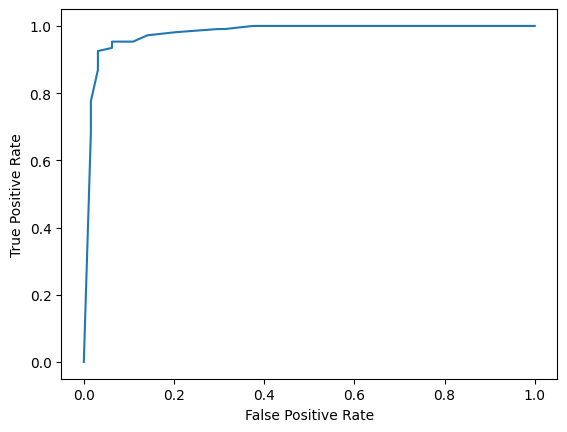

In [6]:
dataset = load_breast_cancer()


X = np.array(dataset.data)
y = np.array(dataset.target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
L_train, U_train, Ly_train, Uy_train = train_test_split(X_train, y_train, test_size=0.8)
        
co_forest = CoForest(20, 0.75,'log2', 5)
co_forest.fit(L_train, Ly_train, U_train)

y_pred_proba = co_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

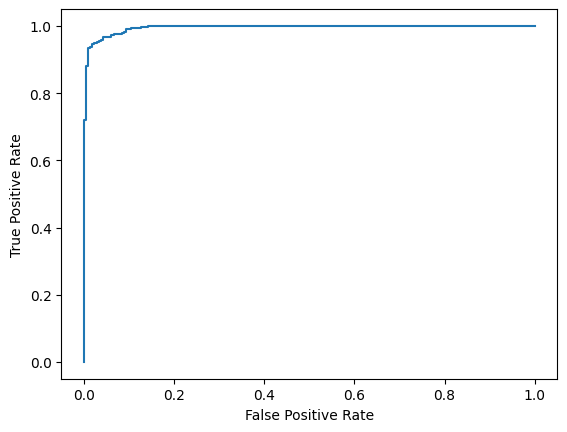

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score



X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])


y_pred_proba = clf.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()